# Driver Lifetime Value

## Assignment

After exploring and analyzing the data, please:

Recommend a Driver's Lifetime Value (i.e., the value of a driver to Lyft over the entire projected lifetime of a driver).
Please answer the following questions:
1. What are the main factors that affect a driver's lifetime value?
2. What is the average projected lifetime of a driver? That is, once a driver is onboarded, how long do they typically continue driving with Lyft?
3. Do all drivers act alike? Are there specific segments of drivers that generate more value for Lyft than the average driver?
4. What actionable recommendations are there for the business?

Prepare and submit a writeup of your findings for consumption by a cross-functional audience.
You can make the following assumptions about the Lyft rate card:

- Base Fare $2.00
- Cost per Mile $1.15
- Cost per Minute $0.22
- Service Fee $1.75
- Minimum Fare $5.00
- Maximum Fare $400.00

In [72]:
import pandas as pd
import numpy as np

In [73]:
drivers = pd.read_csv('/Users/rosiebai/Downloads/datasets-11/driver_ids.csv')
rides = pd.read_csv('/Users/rosiebai/Downloads/datasets-11/ride_ids.csv')
events = pd.read_csv('/Users/rosiebai/Downloads/datasets-11/ride_timestamps.csv')

In [74]:
drivers.head()

,driver_id,driver_onboard_date
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00
1,007f0389f9c7b03ef97098422f902e62,2016-03-29 00:00:00
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05 00:00:00
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23 00:00:00
4,01674381af7edd264113d4e6ed55ecda,2016-04-29 00:00:00


In [75]:
rides.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100


In [76]:
events.head()

,ride_id,event,timestamp
0,00003037a262d9ee40e61b5c0718f7f0,requested_at,2016-06-13 09:39:19
1,00003037a262d9ee40e61b5c0718f7f0,accepted_at,2016-06-13 09:39:51
2,00003037a262d9ee40e61b5c0718f7f0,arrived_at,2016-06-13 09:44:31
3,00003037a262d9ee40e61b5c0718f7f0,picked_up_at,2016-06-13 09:44:33
4,00003037a262d9ee40e61b5c0718f7f0,dropped_off_at,2016-06-13 10:03:05


In [77]:
data = events.merge(rides, on = 'ride_id', how = 'left')
data = data.merge(drivers, on = 'driver_id', how = 'left')
data.columns

Index(['ride_id', 'event', 'timestamp', 'driver_id', 'ride_distance',
       'ride_duration', 'ride_prime_time', 'driver_onboard_date'],
      dtype='object')

In [78]:
data.head()

,ride_id,event,timestamp,driver_id,ride_distance,ride_duration,ride_prime_time,driver_onboard_date
0,00003037a262d9ee40e61b5c0718f7f0,requested_at,2016-06-13 09:39:19,d967f5296732fa55266b5f1314e7447b,3698.0,1112.0,0.0,2016-04-09 00:00:00
1,00003037a262d9ee40e61b5c0718f7f0,accepted_at,2016-06-13 09:39:51,d967f5296732fa55266b5f1314e7447b,3698.0,1112.0,0.0,2016-04-09 00:00:00
2,00003037a262d9ee40e61b5c0718f7f0,arrived_at,2016-06-13 09:44:31,d967f5296732fa55266b5f1314e7447b,3698.0,1112.0,0.0,2016-04-09 00:00:00
3,00003037a262d9ee40e61b5c0718f7f0,picked_up_at,2016-06-13 09:44:33,d967f5296732fa55266b5f1314e7447b,3698.0,1112.0,0.0,2016-04-09 00:00:00
4,00003037a262d9ee40e61b5c0718f7f0,dropped_off_at,2016-06-13 10:03:05,d967f5296732fa55266b5f1314e7447b,3698.0,1112.0,0.0,2016-04-09 00:00:00


## Feature Engineering

In [79]:
data['event'].unique()

array(['requested_at', 'accepted_at', 'arrived_at', 'picked_up_at',
       'dropped_off_at'], dtype=object)

In [80]:
last_dropoff = data[data['event'] == 'dropped_off_at'].groupby('driver_id')['timestamp'].max().reset_index(name = 'last_dropoff')
drivers = drivers.merge(last_dropoff, on = 'driver_id', how = 'left')
drivers['last_dropoff'] = pd.to_datetime(drivers['last_dropoff'] )
drivers['driver_onboard_date'] = pd.to_datetime(drivers['driver_onboard_date'])
drivers['tenure'] = (drivers['last_dropoff'] - drivers['driver_onboard_date']).dt.days
drivers.head()

,driver_id,driver_onboard_date,last_dropoff,tenure
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29,2016-06-23 10:29:53,86.0
1,007f0389f9c7b03ef97098422f902e62,2016-03-29,2016-06-22 13:28:38,85.0
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05,2016-06-12 20:30:38,68.0
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23,2016-06-26 10:36:13,64.0
4,01674381af7edd264113d4e6ed55ecda,2016-04-29,2016-06-24 13:27:38,56.0


In [81]:
drivers.tenure.isna().sum()

100

In [82]:
len(drivers)

937

In [83]:
total_rides = data.groupby('driver_id')['ride_id'].nunique().reset_index(name = 'total_rides')
drivers = drivers.merge(total_rides, on = 'driver_id', how = 'left')
drivers.head()

,driver_id,driver_onboard_date,last_dropoff,tenure,total_rides
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29,2016-06-23 10:29:53,86.0,277.0
1,007f0389f9c7b03ef97098422f902e62,2016-03-29,2016-06-22 13:28:38,85.0,31.0
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05,2016-06-12 20:30:38,68.0,34.0
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23,2016-06-26 10:36:13,64.0,191.0
4,01674381af7edd264113d4e6ed55ecda,2016-04-29,2016-06-24 13:27:38,56.0,375.0


In [84]:
subset1 = data[['driver_id','ride_id','ride_distance','ride_duration']].drop_duplicates()
total_distance = subset1.groupby('driver_id')['ride_distance'].sum().reset_index(name = 'total_distance(in meters)')
total_duration = subset1.groupby('driver_id')['ride_duration'].sum().reset_index(name = 'total_duration(in seconds)')
total_distance['total_distance (in miles)'] = total_distance['total_distance(in meters)']/1609.34
total_duration['total_duration (in minutes)'] = total_duration['total_duration(in seconds)']/60
drivers = drivers.merge(total_distance, on = 'driver_id', how = 'left')
drivers = drivers.merge(total_duration, on = 'driver_id', how = 'left')


In [85]:
# Given that Cost per Mile $1.15 and Cost per Minute $0.22, Base Fare $2.00, Service Fee $1.75
# per ride fare
drivers['total_costs'] = drivers['total_distance (in miles)'] * 1.15 + drivers['total_duration (in minutes)'] * 0.22
drivers['base_fare'] = drivers['total_rides']* (2.0 + 1.75) 
drivers['fare'] = drivers['base_fare'] + drivers['total_costs']

In [86]:
# prime time exposure (% of rides with ride_prime_time > 0)
data['prime_time_exposure'] = np.where(data['ride_prime_time']> 0, 1 , 0)
prime_time_exposure = data.groupby('driver_id')['prime_time_exposure'].mean().reset_index(name = 'prime_time_exposure_pct')
drivers = drivers.merge(prime_time_exposure, on = 'driver_id', how = 'left')
drivers['fare'] = drivers['fare'] * (1 + drivers['prime_time_exposure_pct'])

In [87]:
# avg distance per ride 
drivers['avg_distance_per_ride'] = drivers['total_distance (in miles)']/drivers['total_rides']
# avg duration per ride 
drivers['avg_duration_per_ride'] = drivers['total_duration (in minutes)']/drivers['total_rides']

In [88]:
drivers.head()

,driver_id,driver_onboard_date,last_dropoff,tenure,total_rides,total_distance(in meters),total_distance (in miles),total_duration(in seconds),total_duration (in minutes),total_costs,base_fare,fare,prime_time_exposure_pct,avg_distance_per_ride,avg_duration_per_ride
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29,2016-06-23 10:29:53,86.0,277.0,1740287.0,1081.366896,221238.0,3687.300000,2054.777930,1038.75,4322.004725,0.397112,3.903852,13.311552
1,007f0389f9c7b03ef97098422f902e62,2016-03-29,2016-06-22 13:28:38,85.0,31.0,117531.0,73.030559,20497.0,341.616667,159.140810,116.25,381.993704,0.387097,2.355824,11.019892
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05,2016-06-12 20:30:38,68.0,34.0,269653.0,167.555023,29205.0,486.750000,299.773276,127.50,628.343053,0.470588,4.928089,14.316176
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23,2016-06-26 10:36:13,64.0,191.0,1471239.0,914.187804,174521.0,2908.683333,1691.226308,716.25,3012.496531,0.251309,4.786324,15.228709
4,01674381af7edd264113d4e6ed55ecda,2016-04-29,2016-06-24 13:27:38,56.0,375.0,3123644.0,1940.947221,357443.0,5957.383333,3542.713637,1406.25,6255.490037,0.264000,5.175859,15.886356


In [89]:
drivers.columns

Index(['driver_id', 'driver_onboard_date', 'last_dropoff', 'tenure',
       'total_rides', 'total_distance(in meters)', 'total_distance (in miles)',
       'total_duration(in seconds)', 'total_duration (in minutes)',
       'total_costs', 'base_fare', 'fare', 'prime_time_exposure_pct',
       'avg_distance_per_ride', 'avg_duration_per_ride'],
      dtype='object')

In [90]:
drivers.isna().sum()

driver_id                        0
driver_onboard_date              0
last_dropoff                   100
tenure                         100
total_rides                    100
total_distance(in meters)      100
total_distance (in miles)      100
total_duration(in seconds)     100
total_duration (in minutes)    100
total_costs                    100
base_fare                      100
fare                           100
prime_time_exposure_pct        100
avg_distance_per_ride          100
avg_duration_per_ride          100
dtype: int64

In [91]:
drivers = drivers.dropna()

## Model Training

In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm

# Assuming drivers is your aggregated dataframe
X = drivers[[
    'total_rides',
    'tenure',
    'prime_time_exposure_pct',
    'avg_distance_per_ride',
    'avg_duration_per_ride'
]]
# Add constant (intercept term)
X = sm.add_constant(X)
y = drivers['fare']
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# linear regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred_lr = linreg.predict(X_test)

print("Linear Regression Results")
print("R²:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

# Coefficients
coeffs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': linreg.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)
print(coeffs)

model = sm.OLS(y, X).fit()
print(model.summary())



Linear Regression Results
R²: 0.972058843033895
MAE: 291.5335895214231
RMSE: 481.7209627747187
                   Feature  Coefficient
3  prime_time_exposure_pct  1397.712234
4    avg_distance_per_ride   165.452829
5    avg_duration_per_ride    59.146633
1              total_rides    16.001736
2                   tenure    -2.903234
0                    const     0.000000
                            OLS Regression Results                            
Dep. Variable:                   fare   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.076e+04
Date:                Sat, 23 Aug 2025   Prob (F-statistic):               0.00
Time:                        22:07:23   Log-Likelihood:                -6104.5
No. Observations:                 837   AIC:                         1.222e+04
Df Residuals:                     831   BIC:                         1.2

In [93]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Results")
print("R²:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

# Feature Importances
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(importances)



Random Forest Results
R²: 0.9803057597032502
MAE: 194.4547274607544
RMSE: 404.4296331063732
                   Feature  Importance
1              total_rides    0.982815
4    avg_distance_per_ride    0.007675
5    avg_duration_per_ride    0.004724
3  prime_time_exposure_pct    0.003523
2                   tenure    0.001263
0                    const    0.000000


Based on both models, total_rides and average distance per ride are the major factors on drivers lifetime value. 

In [94]:
drivers.tenure.mean()

55.10513739545998

The average projected lifetime value of a driver is around 55 days.

Text(0.5, 1.0, 'Distribution of Driver Lifetime Value(Fare)')

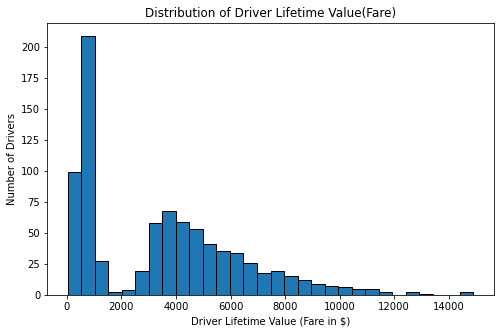

In [95]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,5))
plt.hist(drivers['fare'].dropna(), bins = 30, edgecolor = 'black')
plt.xlabel("Driver Lifetime Value (Fare in $)")
plt.ylabel("Number of Drivers")
plt.title("Distribution of Driver Lifetime Value(Fare)")

Since the distribution is bimodal and right skewed, so not all drivers act alike. 
To find out what segment of dirvers generated more values, let's look at drivers whose fare is higher than the average fare.

In [96]:
drivers.fare.describe()

count      837.000000
mean      3524.002218
std       2887.045823
min         24.598089
25%        705.296798
50%       3509.159090
75%       5329.497925
max      14909.432429
Name: fare, dtype: float64

In [97]:
high_value_drivers = drivers[drivers['fare']> 3524] # higher than average drivers

In [98]:
summary_high = high_value_drivers.describe()
summary_all = drivers.describe()

print("High-value drivers summary:")
print(summary_high[['total_rides',
    'tenure',
    'prime_time_exposure_pct',
    'avg_distance_per_ride',
    'avg_duration_per_ride']])

print("\nAll drivers summary:")
print(summary_all[['total_rides',
    'tenure',
    'prime_time_exposure_pct',
    'avg_distance_per_ride',
    'avg_duration_per_ride']])


High-value drivers summary:
       total_rides      tenure  prime_time_exposure_pct  \
count   417.000000  417.000000               417.000000   
mean    367.040767   65.812950                 0.360876   
min     199.000000   27.000000                 0.126394   
25%     270.000000   54.000000                 0.307143   
50%     331.000000   66.000000                 0.358333   
75%     433.000000   78.000000                 0.418919   
max     919.000000   90.000000                 0.753623   
std     126.955155   14.291893                 0.088780   

       avg_distance_per_ride  avg_duration_per_ride  
count             417.000000             417.000000  
mean                4.348166              14.422119  
min                 2.853363              10.765219  
25%                 3.677686              13.401667  
50%                 4.081946              14.315278  
75%                 4.741925              15.243038  
max                 9.336545              20.477756  
std     

In [99]:
print(' High value drivers total rides are: ',round(((391 - 220)/220)*100,1),'% higher than average drivers')
print(' High value drivers avg_distance_per_ride:', round(((4.38 - 4.47)/4.47)*100, 1), '% higher than average drivers')
print(' High value drivers avg_duration_per_ride:', round(((14.47 - 14.32)/14.32)*100,1), '% higher than average drivers')
print(' High value drivers tenure:',round(((66-55)/55)*100, 1), '% higher than average drivers')
print(' High value drivers prime_time_exposure_pct:', round(((0.36 - 0.32)/0.32)*100,1), '% higher than average drivers')


 High value drivers total rides are:  77.7 % higher than average drivers
 High value drivers avg_distance_per_ride: -2.0 % higher than average drivers
 High value drivers avg_duration_per_ride: 1.0 % higher than average drivers
 High value drivers tenure: 20.0 % higher than average drivers
 High value drivers prime_time_exposure_pct: 12.5 % higher than average drivers


Drivers with LTV > 3524 typically have 391 rides, 20% higher tenure, and 12.5% more prime time exposure compared to the average driver.

recommendations for the business:
- provide some incentives for drivers to increase the total rides
- provide some incentives for drivers to go to high traffic areas, go to big event areas to improve the prime time exposure
- try to retain the talent if drivers are performing well